## Data cleaning

Als eerst moeten de twee datasets worden gecombineerd.
Voor het Suvey bestand was dit makkelijk inlezen voor het Steps bestand was dit iets moeilijker, omdat hier de seperater anders was. Dit is opgelost door sep=';' te gebruiken. 

Bij de Steps dataset is het gemiddelde en de mediaan direct toegevoegd aan de datasets zodat dit niet moet gedaan worden als de data al is samengevoegd. 

Daarna worden de datasets samengevoegd en worden de "Onmogelijke data" verwijderd. 

In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('survey.csv')
df1.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [2]:
df2 = pd.read_csv('steps.csv',sep=';')
df2['mean'] = df2.mean(axis=1)
df2['median'] = df2.median(axis=1)
df2.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean,median
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10144.048193,9860.000000
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5652.756098,5374.000000
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8246.033557,8215.516779
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3460.380952,3000.000000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5215.636364,4986.500000


In [5]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean,median
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10144.048193,9860.000000
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5652.756098,5374.000000
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8246.033557,8215.516779
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3460.380952,3000.000000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5215.636364,4986.500000


In [10]:
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

def delete(x):
    if(x > 200): 
        return float('NaN')
    elif(x <= 40):
        return float('NaN')
    else: 
        return x
    
df['weight'] = df['weight'].apply(delete)

C:\Users\dijkm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


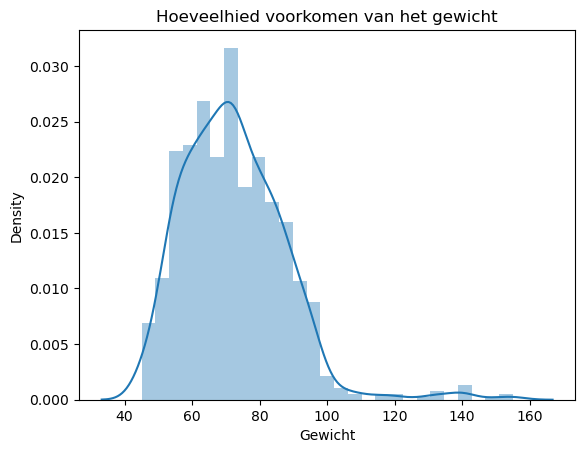

In [11]:
sns.distplot(df['weight'].dropna(), kde=True) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Hoeveelhied voorkomen van het gewicht')
plt.xlabel("Gewicht")
plt.show()
